In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
mainData = pd.read_csv('Maths.csv')
mainData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
mainData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
row = 3
col = 3

mathScore = pd.DataFrame(mainData['math score'])
readingScore = pd.DataFrame(mainData['reading score'])
writingScore = pd.DataFrame(mainData['writing score'])

f, axes = plt.subplots(col, row, figsize=(24, 12))

# Plot the basic uni-variate figures for Math Score
sb.boxplot(data = mathScore, orient = "h", ax = axes[0,0])
sb.histplot(data = mathScore, ax = axes[0,1])
sb.violinplot(data = mathScore, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Reading Score
sb.boxplot(data = readingScore, orient = "h", ax = axes[1,0])
sb.histplot(data = readingScore, ax = axes[1,1])
sb.violinplot(data = readingScore, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for Writing Score
sb.boxplot(data = writingScore, orient = "h", ax = axes[2,0])
sb.histplot(data = writingScore, ax = axes[2,1])
sb.violinplot(data = writingScore, orient = "h", ax = axes[2,2])

KeyError: 'math score'

In [ ]:
race = pd.DataFrame(mainData['race/ethnicity'])

In [ ]:
jointDF = pd.concat([mathScore, race], axis = 1).reindex(mathScore.index)
jointDF

In [ ]:
sb.jointplot(data = jointDF, x = "race/ethnicity", y = "math score", height = 12)

In [5]:
finalgrade = pd.DataFrame(mainData['G3'])
finalgrade.shape
#finalgrade.head()

(395, 1)

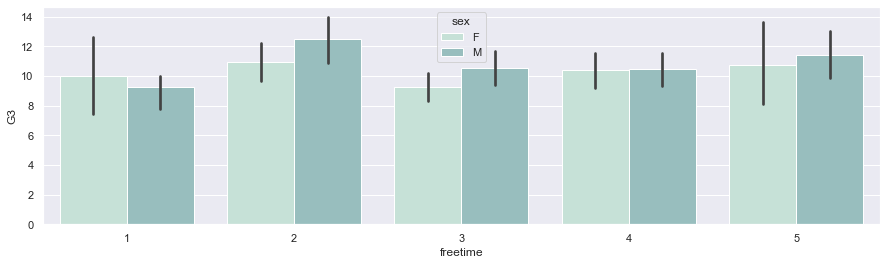

In [6]:
#freetime vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='freetime', y='G3', hue='sex', data=mainData)
plt.show()

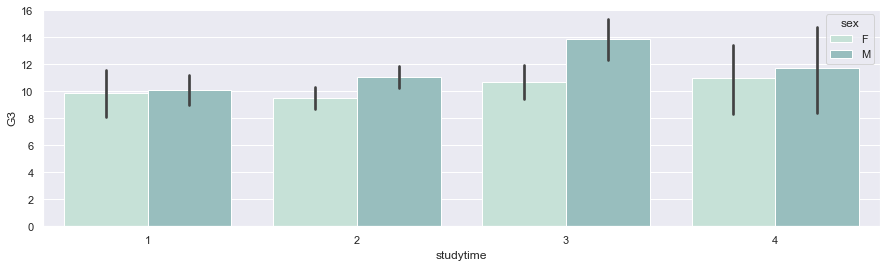

In [7]:
#studytime vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='studytime', y='G3', hue='sex', data=mainData)
plt.show()

In [8]:
mEdu = pd.DataFrame(mainData['Medu'])
fEdu = pd.DataFrame(mainData['Fedu'])
mJob = pd.DataFrame(mainData['Mjob'])
fJob = pd.DataFrame(mainData['Fjob'])

In [9]:
parentsFactor = pd.concat([mEdu, fEdu, mJob, fJob, finalgrade], axis = 1).reindex(mEdu.index)

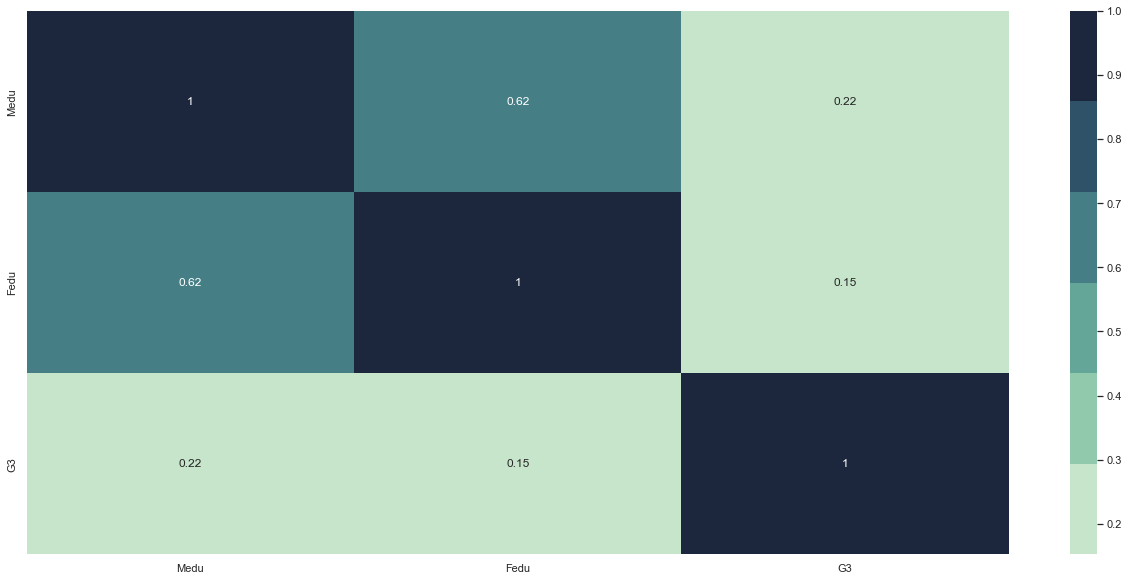

In [10]:
#comparing parents' education and job to G3
fig = plt.figure(figsize=[22,10])
    
sb.heatmap(parentsFactor.corr(), annot=True, cmap=sb.cubehelix_palette(rot=-.4))

plt.show()

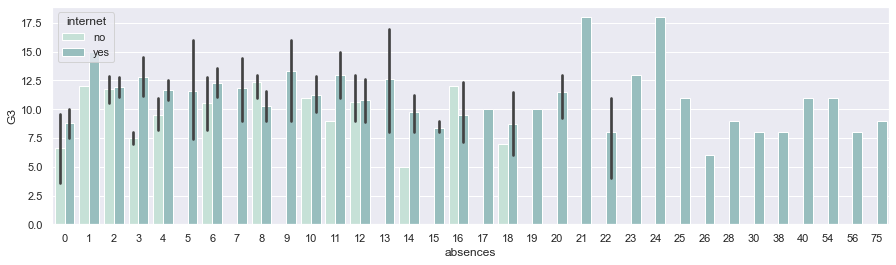

In [11]:
#failures vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='absences', y='G3', hue='internet', data=mainData)
plt.show()